In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import tensorflow as tf
print(tf.keras.__version__)

3.8.0


Task 1

In [3]:
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf

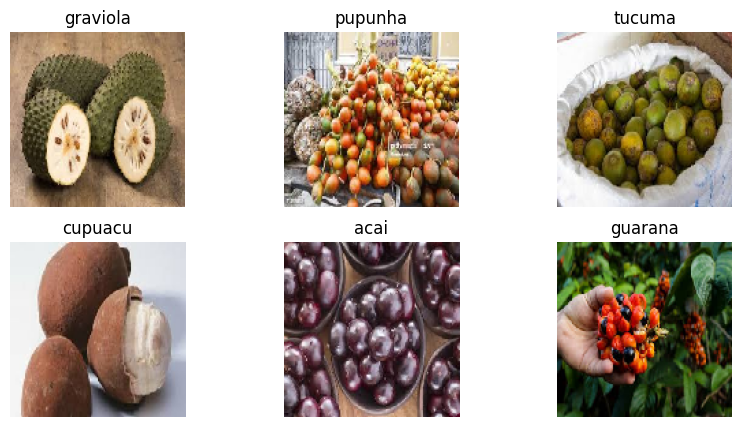

No corrupted images found.


In [5]:

# Task 1: Load and Visualize Data
def load_and_visualize_images(train_dir):
    class_names = os.listdir(train_dir)
    selected_images = []

    for class_name in class_names:
        class_path = os.path.join(train_dir, class_name)
        if os.path.isdir(class_path):  # Ensure it's a directory
            image_name = random.choice(os.listdir(class_path))
            image_path = os.path.join(class_path, image_name)
            selected_images.append((image_path, class_name))

    fig, axes = plt.subplots(2, len(selected_images)//2, figsize=(10, 5))
    axes = axes.flatten()
    for ax, (img_path, label) in zip(axes, selected_images):
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(128, 128))
        ax.imshow(img)
        ax.set_title(label)
        ax.axis('off')
    plt.show()

# Task 1.2: Check for Corrupted Images
def check_corrupted_images(train_dir):
    corrupted_images = []
    for class_name in os.listdir(train_dir):
        class_path = os.path.join(train_dir, class_name)
        if os.path.isdir(class_path):  # Ensure it's a directory
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                try:
                    img = tf.keras.preprocessing.image.load_img(img_path)
                except (IOError, SyntaxError):
                    corrupted_images.append(img_path)
                    os.remove(img_path)
                    print(f"Removed corrupted image: {img_path}")

    if not corrupted_images:
        print("No corrupted images found.")

# Example Usage
train_dir = "/content/drive/MyDrive/AI and ML/workshop5/FruitinAmazon/train"
load_and_visualize_images(train_dir)
check_corrupted_images(train_dir)


Task 2

In [6]:
import tensorflow as tf

def load_and_preprocess_data(train_dir, img_height, img_width, batch_size, validation_split):
    rescale = tf.keras.layers.Rescaling(1./255)

    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        train_dir,
        labels='inferred',
        label_mode='int',
        image_size=(img_height, img_width),
        interpolation='nearest',
        batch_size=batch_size,
        shuffle=True,
        validation_split=validation_split,
        subset='training',
        seed=123
    )

    train_ds = train_ds.map(lambda x, y: (rescale(x), y))

    val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        train_dir,
        labels='inferred',
        label_mode='int',
        image_size=(img_height, img_width),
        interpolation='nearest',
        batch_size=batch_size,
        shuffle=False,
        validation_split=validation_split,
        subset='validation',
        seed=123
    )

    val_ds = val_ds.map(lambda x, y: (rescale(x), y))

    return train_ds, val_ds

# Example usage
img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2
train_ds, val_ds = load_and_preprocess_data(train_dir, img_height, img_width, batch_size, validation_split)



Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


Task 3

In [7]:
from tensorflow.keras import layers, models

def create_cnn_model(num_classes, input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Example usage
num_classes = len(os.listdir(train_dir))  # Adjust based on your dataset
input_shape = (img_height, img_width, 3)
model = create_cnn_model(num_classes, input_shape)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Task 4

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Task 5

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks = [
    ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss'),
    EarlyStopping(patience=10, restore_best_weights=True)
]

history = model.fit(train_ds, epochs=250, validation_data=val_ds, callbacks=callbacks)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 714ms/step - accuracy: 1.0000 - loss: 0.0070

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 1.0000 - loss: 0.0070 - val_accuracy: 0.8889 - val_loss: 0.2393
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0.8889 - val_loss: 0.2598
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 449ms/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.8333 - val_loss: 0.2711
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 543ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 0.8333 - val_loss: 0.2646
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 778ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.8889 - val_loss: 0.2451
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 1.0000 - loss: 0.0025

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 523ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.8889 - val_loss: 0.2390
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 442ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.8889 - val_loss: 0.2523
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 425ms/step - accuracy: 1.0000 - loss: 0.0019 - val_accuracy: 0.8333 - val_loss: 0.2975
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 552ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.8333 - val_loss: 0.3209
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 631ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.8333 - val_loss: 0.3165
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 430ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.8333 - val_loss: 0.3023
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 445ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.8333 - val_loss: 0.2829
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 435ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.8889 - val_loss:

Task 6

In [11]:
import tensorflow as tf

# Define the rescale layer
rescale = tf.keras.layers.Rescaling(1./255)

# Load and preprocess the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/AI and ML/workshop5/FruitinAmazon/test',
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False
)

# Apply the normalization (Rescaling) to the test dataset
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.4f}")


Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.7667 - loss: 0.8707
Test accuracy: 0.7667


Task 7

In [12]:
model.save('final_model.h5')

# Load the model
loaded_model = tf.keras.models.load_model('final_model.h5')

# Re-evaluate the model
test_loss, test_acc = loaded_model.evaluate(test_ds)
print(f"Test accuracy after loading: {test_acc:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step - accuracy: 0.7667 - loss: 0.8707
Test accuracy after loading: 0.7667


Task 8

In [13]:
import numpy as np
from sklearn.metrics import classification_report

predictions = model.predict(test_ds)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.concatenate([y for x, y in test_ds], axis=0)

print(classification_report(true_labels, predicted_labels, target_names=os.listdir(train_dir)))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
              precision    recall  f1-score   support

    graviola       0.71      1.00      0.83         5
     pupunha       0.80      0.80      0.80         5
      tucuma       0.83      1.00      0.91         5
     cupuacu       0.67      0.80      0.73         5
        acai       0.75      0.60      0.67         5
     guarana       1.00      0.40      0.57         5

    accuracy                           0.77        30
   macro avg       0.79      0.77      0.75        30
weighted avg       0.79      0.77      0.75        30



Visualization

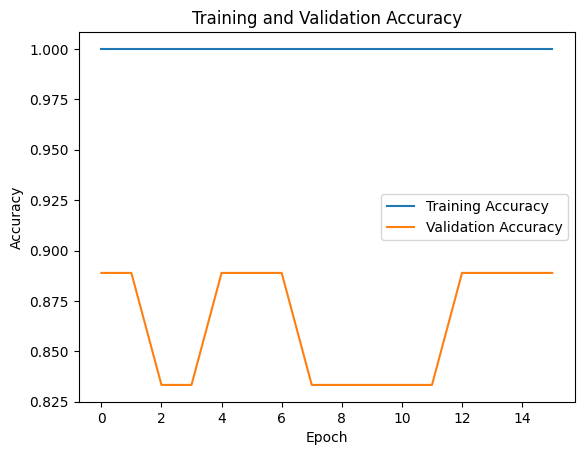

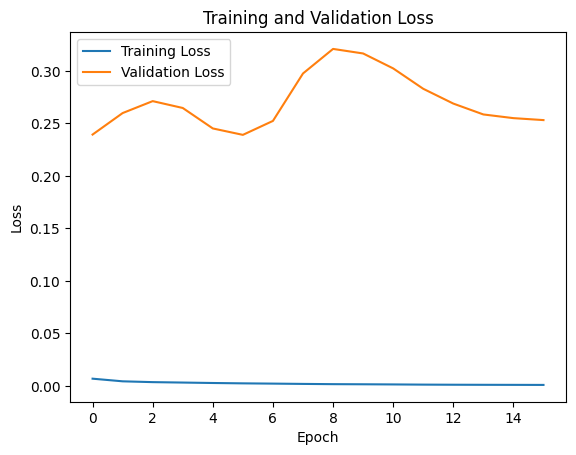

In [14]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()